In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics
%matplotlib inline

In [2]:
thai_df = pd.read_csv("/mnt/d/mywork/Stat/FinalProject/Thailand_data.csv")

In [3]:
thai_df

,province,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,...,Real estate activities,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health activities,"Arts, entertainment and recreation",Other service activities,"Population (1,000 persons)",GPP Per capita (Baht)
0,KHON_KAEN_2016,20935,1206,68849,2746,765,7271,24525,5114,3499,...,6316,185,671,7808,23789,7187,325,1530,1723,113717
1,KHON_KAEN_2017,21757,943,70699,2810,845,6938,26120,4739,4123,...,6989,188,771,8239,25463,7647,374,1533,1721,118576
2,KHON_KAEN_2018,21432,1155,72932,2572,845,7118,27751,4987,4697,...,7883,196,798,8784,25151,8278,430,1514,1718,122950
3,UDON _THANI_2016,18152,6212,14404,1447,495,4787,14378,3288,1403,...,4424,68,796,6823,13399,3634,177,1369,1273,82519
4,UDON _THANI_2017,19548,3864,15094,1497,561,4566,16201,3576,1635,...,5494,58,917,7076,13664,3824,209,1475,1270,86143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,NAKHON_PATHOM_2017,20317,1968,175766,4811,1496,9598,40659,7451,1674,...,4464,1508,756,6635,32804,4047,488,1422,1172,281056
227,NAKHON_PATHOM_2018,21188,2138,190441,4383,1548,10368,45203,7890,1896,...,6459,1521,803,7356,27215,4375,550,1126,1186,294361
228,NONTHABURI_2016,5535,53,47301,5548,1995,15053,52403,9908,5265,...,14057,3642,5124,18164,7697,33769,10502,6353,1621,179147
229,NONTHABURI_2017,5430,53,53499,5454,2260,14256,58351,10549,6650,...,15288,3951,5651,20390,8118,36115,12344,6566,1693,187068


In [4]:
df = thai_df.drop(columns=["province"])

In [5]:
df

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,Real estate activities,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health activities,"Arts, entertainment and recreation",Other service activities,"Population (1,000 persons)",GPP Per capita (Baht)
0,20935,1206,68849,2746,765,7271,24525,5114,3499,1196,...,6316,185,671,7808,23789,7187,325,1530,1723,113717
1,21757,943,70699,2810,845,6938,26120,4739,4123,1309,...,6989,188,771,8239,25463,7647,374,1533,1721,118576
2,21432,1155,72932,2572,845,7118,27751,4987,4697,1658,...,7883,196,798,8784,25151,8278,430,1514,1718,122950
3,18152,6212,14404,1447,495,4787,14378,3288,1403,938,...,4424,68,796,6823,13399,3634,177,1369,1273,82519
4,19548,3864,15094,1497,561,4566,16201,3576,1635,1156,...,5494,58,917,7076,13664,3824,209,1475,1270,86143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,20317,1968,175766,4811,1496,9598,40659,7451,1674,2044,...,4464,1508,756,6635,32804,4047,488,1422,1172,281056
227,21188,2138,190441,4383,1548,10368,45203,7890,1896,2527,...,6459,1521,803,7356,27215,4375,550,1126,1186,294361
228,5535,53,47301,5548,1995,15053,52403,9908,5265,18721,...,14057,3642,5124,18164,7697,33769,10502,6353,1621,179147
229,5430,53,53499,5454,2260,14256,58351,10549,6650,21520,...,15288,3951,5651,20390,8118,36115,12344,6566,1693,187068


In [6]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.364104,-0.134227,0.126155,-0.193774,-0.022216,0.166060,-0.051389,-0.142686,-0.135646,-0.112270,...,0.122865,-0.138362,-0.152367,-0.070379,1.409902,0.287718,-0.125641,-0.093134,0.802924,-0.315790
1,0.435528,-0.143049,0.142102,-0.188636,0.007452,0.139092,-0.038776,-0.150627,-0.123615,-0.108651,...,0.181451,-0.138238,-0.146487,-0.063020,1.561276,0.332666,-0.118515,-0.092946,0.800990,-0.284205
2,0.407289,-0.135937,0.161351,-0.207743,0.007452,0.153669,-0.025878,-0.145376,-0.112549,-0.097476,...,0.259276,-0.137908,-0.144900,-0.053714,1.533063,0.394323,-0.110371,-0.094134,0.798089,-0.255773
3,0.122288,0.033699,-0.343158,-0.298062,-0.122346,-0.035112,-0.131632,-0.181351,-0.176055,-0.120531,...,-0.041837,-0.143198,-0.145017,-0.087196,0.470372,-0.059456,-0.147166,-0.103197,0.367722,-0.518589
4,0.243587,-0.045064,-0.337210,-0.294048,-0.097870,-0.053010,-0.117216,-0.175253,-0.171582,-0.113551,...,0.051309,-0.143611,-0.137903,-0.082877,0.494335,-0.040891,-0.142512,-0.096572,0.364821,-0.495031


Text(0, 0.5, 'SSE')

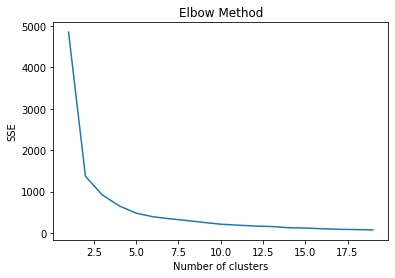

In [7]:
max_k = 20
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [8]:
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=4)

In [9]:
res_df = thai_df.copy()
kmeans_cluster_predictions = kmeans.predict(df_normalized)
res_df['kmeans_cluster_id'] = kmeans_cluster_predictions
res_df

,province,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,...,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health activities,"Arts, entertainment and recreation",Other service activities,"Population (1,000 persons)",GPP Per capita (Baht),kmeans_cluster_id
0,KHON_KAEN_2016,20935,1206,68849,2746,765,7271,24525,5114,3499,...,185,671,7808,23789,7187,325,1530,1723,113717,1
1,KHON_KAEN_2017,21757,943,70699,2810,845,6938,26120,4739,4123,...,188,771,8239,25463,7647,374,1533,1721,118576,1
2,KHON_KAEN_2018,21432,1155,72932,2572,845,7118,27751,4987,4697,...,196,798,8784,25151,8278,430,1514,1718,122950,1
3,UDON _THANI_2016,18152,6212,14404,1447,495,4787,14378,3288,1403,...,68,796,6823,13399,3634,177,1369,1273,82519,1
4,UDON _THANI_2017,19548,3864,15094,1497,561,4566,16201,3576,1635,...,58,917,7076,13664,3824,209,1475,1270,86143,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,NAKHON_PATHOM_2017,20317,1968,175766,4811,1496,9598,40659,7451,1674,...,1508,756,6635,32804,4047,488,1422,1172,281056,0
227,NAKHON_PATHOM_2018,21188,2138,190441,4383,1548,10368,45203,7890,1896,...,1521,803,7356,27215,4375,550,1126,1186,294361,0
228,NONTHABURI_2016,5535,53,47301,5548,1995,15053,52403,9908,5265,...,3642,5124,18164,7697,33769,10502,6353,1621,179147,0
229,NONTHABURI_2017,5430,53,53499,5454,2260,14256,58351,10549,6650,...,3951,5651,20390,8118,36115,12344,6566,1693,187068,0


In [10]:
res_df.kmeans_cluster_id.value_counts()

1    192
0     33
2      3
3      3
Name: kmeans_cluster_id, dtype: int64

In [11]:
print(f'Silhouette score : {metrics.silhouette_score(df,kmeans.labels_)}' )
print(f'Davies Bouldin Score : {metrics.davies_bouldin_score(df,kmeans.labels_)}')

Silhouette score : 0.7188768952724824
Davies Bouldin Score : 0.4232672219284249


In [12]:
cluster = pd.DataFrame()
for i in range(k):
    cluster[f'Cluster {i+1}'] = res_df[res_df['kmeans_cluster_id']==i].mean().round(2)

/tmp/ipykernel_2458/1830607143.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster[f'Cluster {i+1}'] = res_df[res_df['kmeans_cluster_id']==i].mean().round(2)


In [13]:
cluster.drop(cluster.index[-1] , inplace=True)
cluster

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
"Agriculture, forestry and fishing",12845.45,17588.09,19900.33,2498.00
Mining and quarrying,2482.64,1743.82,262056.67,0.00
Manufacturing,214563.70,11838.83,450453.67,606117.67
"Electricity, gas, steam and air conditioning supply",17822.12,1442.24,71150.67,37794.67
"Water supply; sewerage, waste management and remediation activities",1919.27,261.33,2455.67,23224.67
Construction,8637.94,2993.56,7359.67,108017.33
Wholesale and retail trade and repair of motor vehicles,53112.00,9609.55,74112.67,1115444.67
Transportation and storage,28743.88,3044.14,19894.33,381749.67
Accommodation and food service activities,9004.61,4168.32,3655.00,441702.33
Information and communication,4118.94,615.52,1540.67,275821.67


In [14]:
res_df[res_df['kmeans_cluster_id']==0]

,province,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,...,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health activities,"Arts, entertainment and recreation",Other service activities,"Population (1,000 persons)",GPP Per capita (Baht),kmeans_cluster_id
153,CHON_BURI_2016,17512,3997,460858,56565,4444,22782,90290,57498,59285,...,2802,12969,35040,11615,10073,1937,12407,1735,521277,0
154,CHON_BURI_2017,19580,3365,484836,54055,4460,17813,101209,60028,69513,...,3068,13680,36855,12706,10638,2094,14032,1782,535487,0
155,CHON_BURI_2018,19730,3318,522108,66966,4724,17555,111368,65041,78370,...,3277,13902,39755,12110,11490,1705,8441,1819,566801,0
156,CHACHOENGSAO_2016,18240,490,230435,6757,2181,5559,38399,12110,316,...,326,1206,3517,6274,2397,284,1506,792,430851,0
157,CHACHOENGSAO_2017,18254,523,226540,8026,2427,6158,40655,11012,345,...,347,1417,3797,6471,2533,299,1541,806,424355,0
158,CHACHOENGSAO_2018,18303,473,263710,7017,2448,6209,47485,11238,393,...,316,1357,4186,6194,2762,328,1660,823,469539,0
171,PRACHIN_BURI_2016,7787,302,171143,2135,374,1943,24483,1321,655,...,79,435,6478,4603,1478,92,650,599,384327,0
172,PRACHIN_BURI_2017,7083,303,230901,2277,419,2082,30297,1534,787,...,75,479,6651,4740,1534,110,639,612,484920,0
173,PRACHIN_BURI_2018,7045,260,247457,2895,549,2005,34036,1969,901,...,102,489,7008,4547,1649,128,555,621,513789,0
177,RATCHABURI_2016,27768,2314,38626,42043,990,5764,15569,13657,733,...,27,327,8009,6934,3470,336,909,809,219799,0


In [15]:
res_df[res_df['kmeans_cluster_id']==1]

,province,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,...,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health activities,"Arts, entertainment and recreation",Other service activities,"Population (1,000 persons)",GPP Per capita (Baht),kmeans_cluster_id
0,KHON_KAEN_2016,20935,1206,68849,2746,765,7271,24525,5114,3499,...,185,671,7808,23789,7187,325,1530,1723,113717,1
1,KHON_KAEN_2017,21757,943,70699,2810,845,6938,26120,4739,4123,...,188,771,8239,25463,7647,374,1533,1721,118576,1
2,KHON_KAEN_2018,21432,1155,72932,2572,845,7118,27751,4987,4697,...,196,798,8784,25151,8278,430,1514,1718,122950,1
3,UDON _THANI_2016,18152,6212,14404,1447,495,4787,14378,3288,1403,...,68,796,6823,13399,3634,177,1369,1273,82519,1
4,UDON _THANI_2017,19548,3864,15094,1497,561,4566,16201,3576,1635,...,58,917,7076,13664,3824,209,1475,1270,86143,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,ANG_THONG_2017,4747,2309,5842,1725,77,1063,3761,1473,33,...,7,66,1184,1848,1147,115,289,251,114842,1
206,ANG_THONG_2018,5563,2482,5920,1398,123,1046,4377,1501,37,...,9,63,1292,1771,1243,137,229,250,122159,1
207,LOP_BURI_2016,15962,1075,34521,2354,325,2148,9864,2254,449,...,66,335,15481,4796,2233,194,589,779,129404,1
208,LOP_BURI_2017,18110,1294,38776,2483,399,2011,11186,2552,495,...,59,339,15971,4859,2353,232,625,778,142017,1


In [16]:
res_df[res_df['kmeans_cluster_id']==2]

,province,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,...,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health activities,"Arts, entertainment and recreation",Other service activities,"Population (1,000 persons)",GPP Per capita (Baht),kmeans_cluster_id
159,RAYONG_2016,18392,248718,413495,56536,2366,7614,66064,17843,3208,...,23676,3966,7755,3588,2923,337,2174,921,972955,2
160,RAYONG_2017,22342,255652,464253,73696,2482,6910,75628,19075,3581,...,25864,4340,8037,3693,3049,425,2217,954,1038355,2
161,RAYONG_2018,18967,281800,473613,83220,2519,7555,80646,22765,4176,...,26247,5203,8967,3571,3550,448,2295,980,1067449,2


In [17]:
res_df[res_df['kmeans_cluster_id']==3]

,province,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,...,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health activities,"Arts, entertainment and recreation",Other service activities,"Population (1,000 persons)",GPP Per capita (Baht),kmeans_cluster_id
213,BANGKOK_METROPOLIS_2016,2479,0,601000,38798,21202,102327,1028711,362345,375719,...,198374,145272,504036,77923,80518,53449,131991,8753,543199,3
214,BANGKOK_METROPOLIS_2017,2414,0,594681,38225,22898,109938,1104473,383936,447780,...,214030,147960,522882,82396,84661,59039,138233,8832,571438,3
215,BANGKOK_METROPOLIS_2018,2601,0,622672,36361,25574,111787,1213150,398968,501608,...,224798,152612,533666,108512,89052,66330,152761,8912,604421,3


In [18]:
df = thai_df.drop(columns=['province'])


df = df[[ "Agriculture, forestry and fishing"
         ,"Manufacturing"
         ,"Mining and quarrying"
         ,"Population (1,000 persons)"
         ,"GPP Per capita (Baht)"]]

In [19]:
df

,"Agriculture, forestry and fishing",Manufacturing,Mining and quarrying,"Population (1,000 persons)",GPP Per capita (Baht)
0,20935,68849,1206,1723,113717
1,21757,70699,943,1721,118576
2,21432,72932,1155,1718,122950
3,18152,14404,6212,1273,82519
4,19548,15094,3864,1270,86143
...,...,...,...,...,...
226,20317,175766,1968,1172,281056
227,21188,190441,2138,1186,294361
228,5535,47301,53,1621,179147
229,5430,53499,53,1693,187068


In [20]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,0.364104,0.126155,-0.134227,0.802924,-0.315790
1,0.435528,0.142102,-0.143049,0.800990,-0.284205
2,0.407289,0.161351,-0.135937,0.798089,-0.255773
3,0.122288,-0.343158,0.033699,0.367722,-0.518589
4,0.243587,-0.337210,-0.045064,0.364821,-0.495031


Text(0, 0.5, 'SSE')

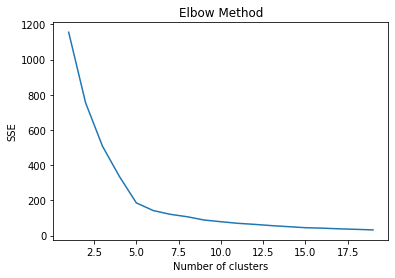

In [21]:
max_k = 20
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [22]:
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=4)

In [23]:
res_df = thai_df.copy()

res_df = res_df[[ "province","Agriculture, forestry and fishing"
         ,"Manufacturing"
         ,"Mining and quarrying"
         ,"Population (1,000 persons)"
         ,"GPP Per capita (Baht)"]]
kmeans_cluster_predictions = kmeans.predict(df_normalized)
res_df['kmeans_cluster_id'] = kmeans_cluster_predictions
res_df

,province,"Agriculture, forestry and fishing",Manufacturing,Mining and quarrying,"Population (1,000 persons)",GPP Per capita (Baht),kmeans_cluster_id
0,KHON_KAEN_2016,20935,68849,1206,1723,113717,0
1,KHON_KAEN_2017,21757,70699,943,1721,118576,0
2,KHON_KAEN_2018,21432,72932,1155,1718,122950,0
3,UDON _THANI_2016,18152,14404,6212,1273,82519,0
4,UDON _THANI_2017,19548,15094,3864,1270,86143,0
...,...,...,...,...,...,...,...
226,NAKHON_PATHOM_2017,20317,175766,1968,1172,281056,3
227,NAKHON_PATHOM_2018,21188,190441,2138,1186,294361,3
228,NONTHABURI_2016,5535,47301,53,1621,179147,0
229,NONTHABURI_2017,5430,53499,53,1693,187068,0


In [24]:
res_df.kmeans_cluster_id.value_counts()

0    198
3     27
1      3
2      3
Name: kmeans_cluster_id, dtype: int64

In [25]:
print(f'Silhouette score : {metrics.silhouette_score(df,kmeans.labels_)}' )
print(f'Davies Bouldin Score : {metrics.davies_bouldin_score(df,kmeans.labels_)}')

Silhouette score : 0.7616378682154574
Davies Bouldin Score : 0.37228787572450134


In [26]:
cluster = pd.DataFrame()
for i in range(4):
    cluster[f'Cluster {i+1}'] = res_df[res_df['kmeans_cluster_id']==i].mean().round(2)

/tmp/ipykernel_2458/2848812207.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster[f'Cluster {i+1}'] = res_df[res_df['kmeans_cluster_id']==i].mean().round(2)


In [27]:
cluster.drop(cluster.index[-1] , inplace=True)
cluster

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
"Agriculture, forestry and fishing",17553.52,19900.33,2498.00,12045.04
Manufacturing,12833.11,450453.67,606117.67,252322.30
Mining and quarrying,1727.07,262056.67,0.00,2769.63
"Population (1,000 persons)",729.28,951.67,8832.33,1203.00
GPP Per capita (Baht),112851.01,1026253.00,573019.33,383273.85


In [28]:
res_df[res_df['kmeans_cluster_id']==0]

,province,"Agriculture, forestry and fishing",Manufacturing,Mining and quarrying,"Population (1,000 persons)",GPP Per capita (Baht),kmeans_cluster_id
0,KHON_KAEN_2016,20935,68849,1206,1723,113717,0
1,KHON_KAEN_2017,21757,70699,943,1721,118576,0
2,KHON_KAEN_2018,21432,72932,1155,1718,122950,0
3,UDON _THANI_2016,18152,14404,6212,1273,82519,0
4,UDON _THANI_2017,19548,15094,3864,1270,86143,0
...,...,...,...,...,...,...,...
208,LOP_BURI_2017,18110,38776,1294,778,142017,0
209,LOP_BURI_2018,20601,34067,922,777,142741,0
228,NONTHABURI_2016,5535,47301,53,1621,179147,0
229,NONTHABURI_2017,5430,53499,53,1693,187068,0


In [29]:
res_df[res_df['kmeans_cluster_id']==1]

,province,"Agriculture, forestry and fishing",Manufacturing,Mining and quarrying,"Population (1,000 persons)",GPP Per capita (Baht),kmeans_cluster_id
159,RAYONG_2016,18392,413495,248718,921,972955,1
160,RAYONG_2017,22342,464253,255652,954,1038355,1
161,RAYONG_2018,18967,473613,281800,980,1067449,1


In [30]:
res_df[res_df['kmeans_cluster_id']==2]

,province,"Agriculture, forestry and fishing",Manufacturing,Mining and quarrying,"Population (1,000 persons)",GPP Per capita (Baht),kmeans_cluster_id
213,BANGKOK_METROPOLIS_2016,2479,601000,0,8753,543199,2
214,BANGKOK_METROPOLIS_2017,2414,594681,0,8832,571438,2
215,BANGKOK_METROPOLIS_2018,2601,622672,0,8912,604421,2


In [31]:
res_df[res_df['kmeans_cluster_id']==3]

,province,"Agriculture, forestry and fishing",Manufacturing,Mining and quarrying,"Population (1,000 persons)",GPP Per capita (Baht),kmeans_cluster_id
153,CHON_BURI_2016,17512,460858,3997,1735,521277,3
154,CHON_BURI_2017,19580,484836,3365,1782,535487,3
155,CHON_BURI_2018,19730,522108,3318,1819,566801,3
156,CHACHOENGSAO_2016,18240,230435,490,792,430851,3
157,CHACHOENGSAO_2017,18254,226540,523,806,424355,3
158,CHACHOENGSAO_2018,18303,263710,473,823,469539,3
171,PRACHIN_BURI_2016,7787,171143,302,599,384327,3
172,PRACHIN_BURI_2017,7083,230901,303,612,484920,3
173,PRACHIN_BURI_2018,7045,247457,260,621,513789,3
195,SARABURI_2016,12164,113403,17027,750,318816,3
